In [44]:
#prepare data
#build model
#fit data
#make predictions evaluate

In [71]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [72]:
#data preparing

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias

In [73]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [74]:
#splitting data into training and testing

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [75]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [76]:
#plot prediction 

def plot_prediction(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    plt.legend(prop={"size":14})

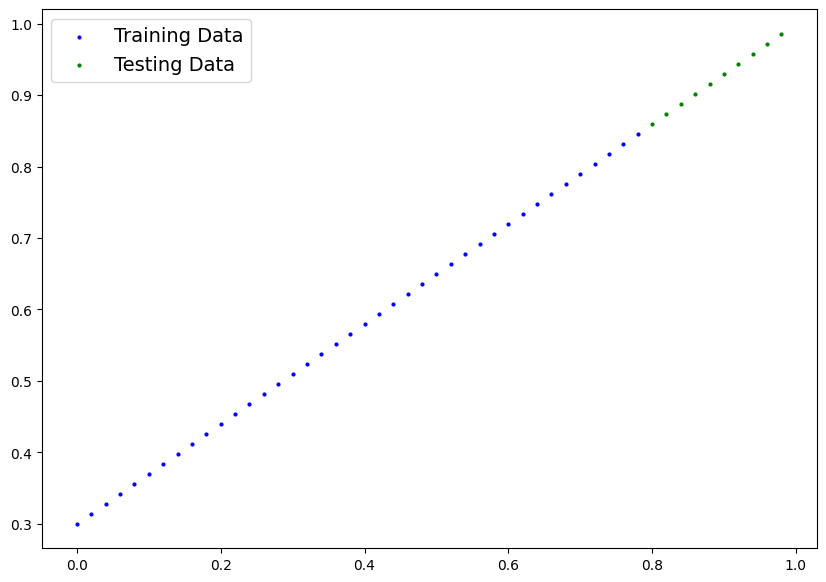

In [77]:
plot_prediction()

In [78]:
#building a model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.biases = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.biases

In [79]:
#pytorch model building essentials
#Checking the contents of our pytorch model

torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [80]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [81]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('biases', tensor([0.1288]))])

In [82]:
weight, bias

(0.7, 0.3)

In [83]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [84]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

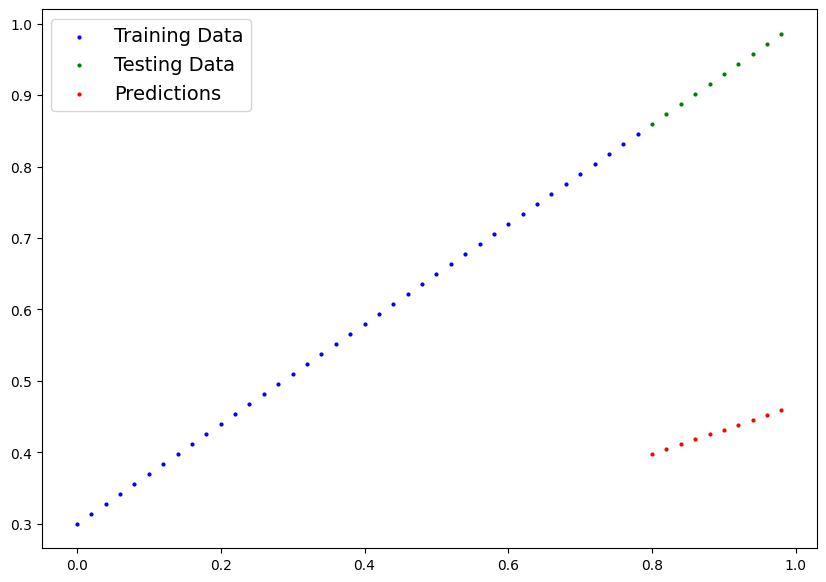

In [85]:
plot_prediction(predictions=y_pred)

In [86]:
#training the model

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('biases', tensor([0.1288]))])

In [87]:
loss = torch.nn.L1Loss()
loss

L1Loss()

In [88]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [89]:
#building a training loop

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss1 = loss(y_pred, y_train)
    print(f"Loss: {loss1}")
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss(test_pred, y_test) 
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss1)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch} | Loss: {loss1} | Test Loss: {test_loss }')
        print(model_0.state_dict())
    

Loss: 0.31288135051727295
Epoch: 0 | Loss: 0.31288135051727295 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('biases', tensor([0.1388]))])
Loss: 0.3013603687286377
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713389158249
Epoch: 10 | Loss: 0.1976713389158249 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('biases', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293157339096
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912162065506
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.2172965705394745
OrderedDict([('weights', tensor([0.4184])), ('biases', tensor([0.3333]))])
Loss: 0.08227582275867462
Lo

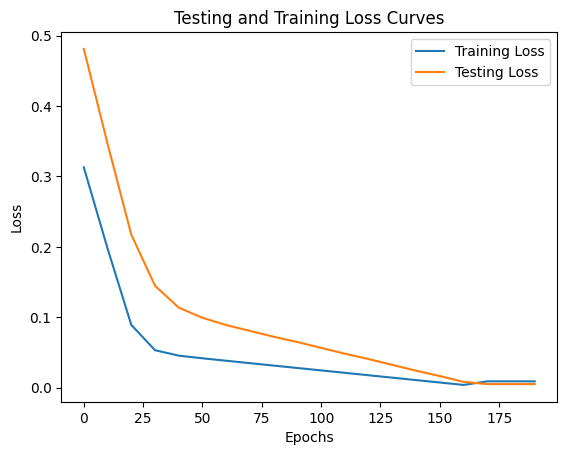

In [94]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Training Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label='Testing Loss')
plt.title('Testing and Training Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [90]:
weight, bias

(0.7, 0.3)

In [91]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

print(y_preds_new)

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


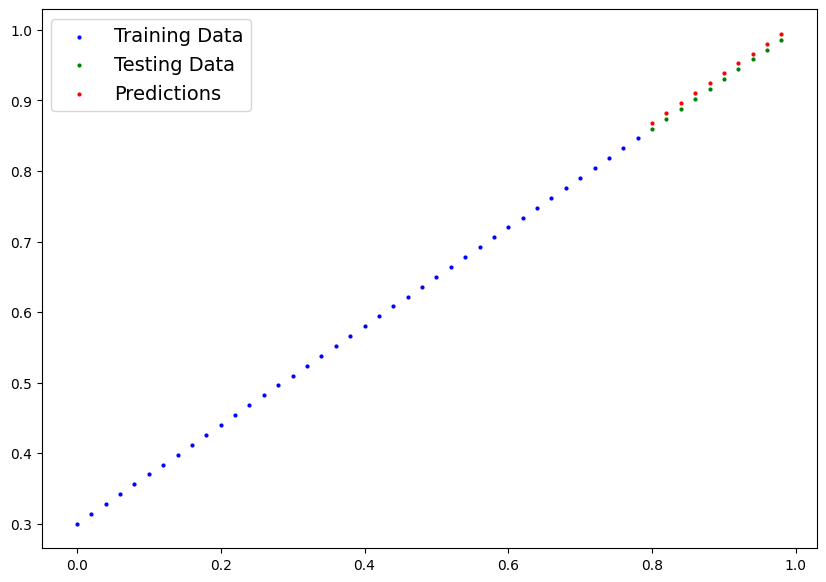

In [92]:
plot_prediction(predictions=y_preds_new)

In [97]:
#writing code to save a pytorch model

from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [98]:
#save the model state dict

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [103]:
#loading saved models

model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('biases', tensor([0.3093]))])

In [112]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([1.3525])), ('biases', tensor([0.6863]))])

In [113]:
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [114]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('biases', tensor([0.3093]))])

In [115]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)

loaded_model_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [117]:
y_preds_new == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])